In [ ]:
!pip install flair
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from flair.models import TextClassifier
from flair.data import Sentence

nltk.download('stopwords')

# Carrega a tabela com os sambas da Portela
portela_csv = pd.read_csv('Portela_csv.csv')

# Lista de stopwords para português
stop_words = stopwords.words('portuguese')

# Função para remover stopwords do texto
def remove_stopwords(text):
    words = text.split()
    return " ".join([word for word in words if word.lower() not in stop_words])

# Função para realizar a análise de sentimento com TextBlob
def analyze_sentiment_textblob(text):
    # Remove stopwords do texto
    text = remove_stopwords(text)
    # Realiza a análise de sentimento com TextBlob
    sentiment = TextBlob(text).sentiment.polarity
    return sentiment

# Função para realizar a análise de sentimento com Flair NLP
def analyze_sentiment_flair(text):
    # Cria um objeto Sentence do Flair NLP com o texto
    sentence = Sentence(text)
    # Realiza a análise de sentimento com Flair NLP
    classifier.predict(sentence)
    sentiment = sentence.labels[0].score
    return sentiment

# Carrega o modelo pré-treinado "sentiment" do Flair NLP
classifier = TextClassifier.load('sentiment')

# Aplica a análise de sentimento com TextBlob para cada linha da coluna "Letra"
portela_csv['Sentiment_TextBlob'] = portela_csv['Letra'].apply(analyze_sentiment_textblob)

# Aplica a análise de sentimento com Flair NLP para cada linha da coluna "Letra"
portela_csv['Sentiment_Flair'] = portela_csv['Letra'].apply(analyze_sentiment_flair)


In [24]:
# Exibe estatísticas descritivas da coluna de sentimentos do TextBlob
print(portela_csv['Sentiment_TextBlob'].head(10))

# Exibe estatísticas descritivas da coluna de sentimentos do Flair NLP
print(portela_csv['Sentiment_Flair'].head(10))

# O maior ano 
print(portela_csv['Sentiment_Flair'].max)

portela_csv.to_csv('Processadas.csv')

0    0.0
1    0.0
2   -0.8
3    0.1
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Sentiment_TextBlob, dtype: float64
0    0.981124
1    0.785730
2    0.925038
3    0.943943
4    0.969699
5    0.865788
6    0.969699
7    0.985187
8    0.969699
9    0.961229
Name: Sentiment_Flair, dtype: float64
<bound method NDFrame._add_numeric_operations.<locals>.max of 0     0.981124
1     0.785730
2     0.925038
3     0.943943
4     0.969699
        ...   
86    0.886797
87    0.588750
88    0.879476
89    0.665278
90    0.919322
Name: Sentiment_Flair, Length: 91, dtype: float64>


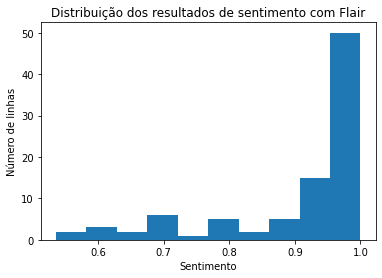

In [9]:
import matplotlib.pyplot as plt

# Cria um histograma dos resultados de sentimento com TextBlob
plt.hist(portela_csv['Sentiment_Flair'])
plt.title('Distribuição dos resultados de sentimento com Flair')
plt.xlabel('Sentimento')
plt.ylabel('Número de linhas')
plt.show()

In [ ]:
# Realiza a análise de sentimento com Flair para cada linha da coluna "Letra"
sentiments = []
for letra in portela_csv['Letra']:
    sentence = Sentence(letra)
    classifier.predict(sentence)
    sentiment = sentence.labels[0]
    sentiments.append(sentiment)

# Adiciona a coluna de sentimento ao DataFrame
portela_csv['Sentiment_Flair'] = sentiments

# Cria um gráfico de barras relacionando o sentimento com o ano
portela_csv.groupby(['Ano', 'Sentiment_Flair'])

In [26]:
# Importa a classe Sentiment para análise de sentimento com Flair
from flair.models import TextClassifier
from flair.data import Sentence

# Inicializa o classificador de sentimento do Flair
classifier = TextClassifier.load('en-sentiment')

# Realiza a análise de sentimento com Flair para cada linha da coluna "Letra"
sentiments = []
for letra in portela_csv['Letra']:
    sentence = Sentence(letra)
    classifier.predict(sentence)
    sentiment = sentence.labels[0].score
    sentiments.append(sentiment)

# Adiciona a coluna de sentimento ao DataFrame
portela_csv['Sentiment_Flair'] = sentiments

# Define a função para extrair a década do ano
def extract_decade(year):
    return str(year)[:3] + '0'

# Adiciona a coluna de década ao DataFrame
portela_csv['Decada'] = portela_csv['Ano'].apply(extract_decade)

# Agrupa as linhas por década e calcula a média de sentimento para cada grupo
means = portela_csv.groupby('Decada')['Sentiment_Flair'].mean()

# Exibe a maior média e a década correspondente
print('Maior média de sentimento:', means.max())
print('Década correspondente:', means.idxmax())

# Exibe a menor média e a década correspondente
print('Menor média de sentimento:', means.min())
print('Década correspondente:', means.idxmin())

# Exibe as médias por década
print('Médias por década:')
print(means)


2023-02-17 15:08:06,478 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt
Maior média de sentimento: 0.965879601240158
Década correspondente: 1960
Menor média de sentimento: 0.77853342294693
Década correspondente: 1980
Médias por década:
Decada
1930    0.928276
1940    0.963546
1950    0.952141
1960    0.965880
1970    0.936619
1980    0.778533
1990    0.930573
2000    0.935761
2010    0.822215
2020    0.821359
Name: Sentiment_Flair, dtype: float64


In [25]:
portela_csv.to_csv = ('Decadas.csv')

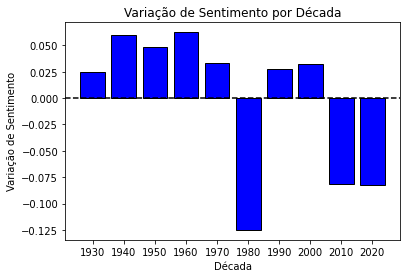

In [15]:
# Define a função para plotar as barras com as variações de sentimento
def plot_bars(means):
    # Define a largura e o espaço entre as barras
    width = 0.8
    spacing = 0.05
    
    # Define a posição das barras e as variações em relação à média de cada década
    x = [i for i in range(len(means))]
    y = [mean - means.mean() for mean in means]
    
    # Plota as barras
    plt.bar(x, y, width=width, color='blue', edgecolor='black')
    
    # Plota a linha da média de cada década
    plt.axhline(y=0, color='black', linestyle='--')
    
    # Define as legendas e os rótulos do eixo x
    plt.xticks(x, means.index)
    plt.xlabel('Década')
    
    # Define os rótulos do eixo y
    plt.ylabel('Variação de Sentimento')
    
    # Define o título do gráfico
    plt.title('Variação de Sentimento por Década')

# Chama a função para plotar as barras com as variações de sentimento
plot_bars(means)

# Exibe o gráfico
plt.show()

## Este gráfico leva em conta a média como sendo o 0 no eixo Y. As variações são relativas a ela.

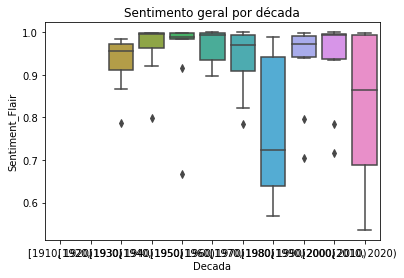

In [21]:
import seaborn as sns
# Divide a coluna "Ano" em décadas
portela_csv['Decada'] = pd.cut(portela_csv['Ano'], bins=range(1910, 2030, 10), right=False)

# Realiza a análise de sentimento com Flair para cada linha da coluna "Letra"
sentiments = []
for letra in portela_csv['Letra']:
    sentence = Sentence(letra)
    classifier.predict(sentence)
    sentiment = sentence.labels[0].score
    sentiments.append(sentiment)

# Adiciona a coluna de sentimento ao DataFrame
portela_csv['Sentiment_Flair'] = sentiments

# Plota o gráfico de caixas
sns.boxplot(x='Decada', y='Sentiment_Flair', data=portela_csv)
plt.title('Sentimento geral por década')
plt.show()